<center>

**Universidad Tecnologica de Panama**
<br></br>
**Facultad de Ingenieria en Sistemas Computacionales**

**Maestria en Analisis de Datos**

**Profesor:** Luis Mendoza
<br></br>
**Laboratorio #3: Limpieza de Datos**

**Dataset: Board Game Data Analysis and Popularity Prediction
**

https://www.kaggle.com/code/devraai/board-game-data-analysis-and-popularity-prediction
<br></br>

**Presentado por:**

Juan Bocaranda 2-741-2264<br>
Luis Carlos Lasso 8-811-1615<br>
Jesus Solis 8-917-85<br>
Roberto Villareal 20-15-8509<br>
<br></br>
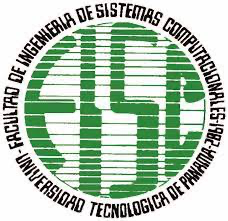


</center>


In [10]:
import os
print(os.getcwd())

c:\Users\chima\repos\Maestria\Intro_a_la_ciencia_de_datos


# Dataset

El conjunto de datos incluye los siguientes atributos para cada juego de mesa:

* ID del Juego de Mesa: Un identificador único para cada juego de mesa (Número).
* Nombre: El título del juego de mesa (Texto).
* Año de Publicación: El año en que el juego fue publicado por primera vez (Número).
* Número Mínimo de Jugadores: El número mínimo de jugadores recomendado para jugar el juego (Número).
* Número Máximo de Jugadores: El número máximo de jugadores recomendado para jugar el juego (Número).
* Tiempo de Juego: La duración promedio requerida para jugar el juego, generalmente en minutos (Número).
* Edad Mínima Recomendada: La edad mínima recomendada para los jugadores (Número).
* Número de Calificaciones de Usuarios: El número total de usuarios que han calificado el juego (Número).
* Calificación Promedio: La calificación promedio que el juego ha recibido de los usuarios (Punto Flotante).
* Rango BGG: La clasificación del juego en el sitio web BGG a la fecha de la colección de datos (Número).
* Complejidad Promedio: Una medida de la complejidad del juego basada en las calificaciones de los usuarios, que a menudo refleja la dificultad del juego (Punto Flotante).
* Número de Propietarios Registrados en BGG: El número de usuarios de BGG que han registrado la propiedad del juego (Número).
* Mecánicas: Las diversas mecánicas o sistemas utilizados en el juego (Texto).
* Dominios: Las categorías o dominios a los que pertenece el juego (Texto).

In [139]:
# import libraries
import pandas as pd
import numpy as np

# Reading file
df = pd.read_csv('BGG_Data_Set.csv' ,  encoding='ISO-8859-1')
df.head(15)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
5,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,8.87,6,3.55,21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"
6,182028.0,Through the Ages: A New Story of Civilization,2015.0,2,4,120,14,23061,8.43,7,4.41,26985.0,"Action Points, Auction/Bidding, Auction: Dutch...",Strategy Games
7,220308.0,Gaia Project,2017.0,1,4,150,12,16352,8.49,8,4.35,20312.0,"End Game Bonuses, Hexagon Grid, Income, Modula...",Strategy Games
8,187645.0,Star Wars: Rebellion,2016.0,2,4,240,14,23081,8.42,9,3.71,34849.0,"Area Majority / Influence, Area Movement, Area...",Thematic Games
9,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,8.29,10,3.59,56219.0,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames"


# Informacion inicial

El dataset esta conformado de 20343 obsevaciones en donde no existen espacios vacios. Contiene 14 columnas , 3 columnas son descriptivas y el resto de columnas son cuantitativas.

* Existen algunos id's vacios
* BGG Rank es una columna objetivo

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


Para realizar el análisis descriptivo utilizamos la función describe() , que nos brinda un tabla que incluye por cada columna las cantidades, promedios, desviación estándar, los valores mínimos y máximos.


In [141]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [142]:
df.isnull().sum() # hay valores nulos o vacios

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [143]:
column_names = ["ID", "Year Published", "Owned Users", "Mechanics", "Domains"]

for column in column_names:
    temp_df = df[df[column].isnull()]
    print(f"Dataframe filtered by empty {column} rows")
    print(temp_df.head(20))

Dataframe filtered by empty ID rows
       ID                                               Name  Year Published  \
10776 NaN                            Ace of Aces: Jet Eagles          1990.0   
10835 NaN                                 Die Erben von Hoax          1999.0   
11152 NaN  Rommel in North Africa: The War in the Desert ...          1986.0   
11669 NaN                  Migration: A Story of Generations          2012.0   
12649 NaN                   Die Insel der steinernen Wachter          2009.0   
12764 NaN                   Dragon Ball Z TCG (2014 edition)          2014.0   
13282 NaN                                           Dwarfest          2014.0   
13984 NaN                                                Hus             NaN   
14053 NaN                                        Contrario 2          2006.0   
14663 NaN                           Warage: Extended Edition          2017.0   
16292 NaN                                            Rainbow          2010.0   
1700

# Published year

Existe un dato vacio en cuanto a la columna "published year" por el juego Hus. Este juego tambien conocido como "Mancala es un juego para dos con registros desde el neoliticos alrededor de 5870 A.C.

Es posiblemente un dato aislado, sin embargo agregamso este dato con el fin de posiblemente enriquecer nuestro analisis.


In [144]:
df.loc[df['Name'] == "Hus", "Year Published"] = "-5870"

In [145]:
df[df['Name'] == 'Hus']

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
13984,NaN,Hus,-5870,2,2,40,0,38,6.28,13986,2.0,NaN,NaN,NaN


# Owned Users

Algunos juegos no contienen registro de usuario debido a que el dato esta vacio. Reemplazamos los valores con cero considerando que es una columna de valores continuos

In [146]:
df['Owned Users'] = df['Owned Users'].fillna(0)

In [147]:
df[df['Owned Users'] ==  0]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
2828,202755.0,Guildhall Fantasy: Fellowship,2016.0,2,4,45,10,565,7.13,2830,2.00,0.0,"Hand Management, Take That, Set Collection",NaN
3590,196305.0,Guildhall Fantasy: Alliance,2016.0,2,4,45,10,360,7.20,3592,2.14,0.0,"Hand Management, Set Collection, Take That",NaN
3739,196306.0,Guildhall Fantasy: Coalition,2016.0,2,4,45,10,336,7.19,3741,2.13,0.0,"Hand Management, Set Collection, Take That",NaN
5807,289.0,Chariot Lords,1999.0,3,4,360,12,221,6.68,5809,3.00,0.0,"Area Movement, Variable Player Powers",NaN
9202,6813.0,Operation Market Garden: Descent into Hell,1985.0,2,2,120,12,94,6.72,9204,3.00,0.0,"Dice Rolling, Events, Grid Movement, Hexagon G...",NaN
9317,139.0,Hoax,1981.0,3,12,45,10,216,5.97,9319,1.38,0.0,"Deduction, Hidden Roles, Voting",NaN
10075,266756.0,Devil Boats: PT Boats in the Solomons,2021.0,1,1,60,14,49,7.84,10077,2.83,0.0,NaN,NaN
10776,NaN,Ace of Aces: Jet Eagles,1990.0,2,2,20,10,110,6.26,10778,2.00,0.0,NaN,NaN
10835,NaN,Die Erben von Hoax,1999.0,3,8,45,12,137,6.05,10837,2.00,0.0,NaN,NaN
11152,NaN,Rommel in North Africa: The War in the Desert ...,1986.0,2,2,0,12,53,6.76,11154,4.00,0.0,NaN,NaN


# Mechanics

Las mecanicas son las dinamicas que definen el juego. Esta columna tiene posible valor estadistico por lo que es conveniente prepararlas para su analisis.

In [148]:
df['Mechanics_split'] = df['Mechanics'].str.split(',')
mec_exploded = df.explode('Mechanics_split')

print(mec_exploded)

             ID                Name Year Published  Min Players  Max Players  \
0      174430.0          Gloomhaven         2017.0            1            4   
0      174430.0          Gloomhaven         2017.0            1            4   
0      174430.0          Gloomhaven         2017.0            1            4   
0      174430.0          Gloomhaven         2017.0            1            4   
0      174430.0          Gloomhaven         2017.0            1            4   
...         ...                 ...            ...          ...          ...   
20341    5432.0  Chutes and Ladders         -200.0            2            6   
20341    5432.0  Chutes and Ladders         -200.0            2            6   
20341    5432.0  Chutes and Ladders         -200.0            2            6   
20342   11901.0         Tic-Tac-Toe        -1300.0            2            2   
20342   11901.0         Tic-Tac-Toe        -1300.0            2            2   

       Play Time  Min Age  Users Rated 

In [149]:
mechanics_count = mec_exploded['Mechanics_split'].value_counts()
print(mechanics_count)

Dice Rolling               3198
 Dice Rolling              2474
 Variable Player Powers    2473
 Hand Management           2391
 Set Collection            2335
                           ... 
Once-Per-Game Abilities       1
Auction: Dutch                1
 Action Timer                 1
Lose a Turn                   1
Single Loser Game             1
Name: Mechanics_split, Length: 318, dtype: int64


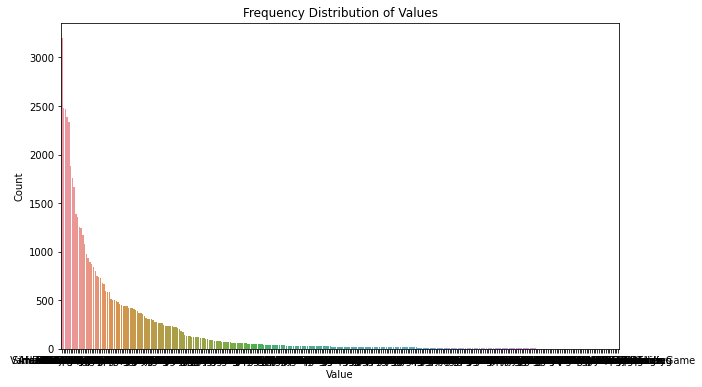

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mechanics_count.index, y=mechanics_count.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Frequency Distribution of Values')
plt.show()

Verificamos la cantidad de filas y columnas

In [151]:
df.shape

(20343, 15)

Verificamos el nombre de las columnas

In [152]:
df.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains',
       'Mechanics_split'],
      dtype='object')

A continuación obtenemos el tipo de datos por cada columna

In [153]:
df.dtypes

ID                    float64
Name                   object
Year Published         object
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
Mechanics_split        object
dtype: object

# Distribución de la variables

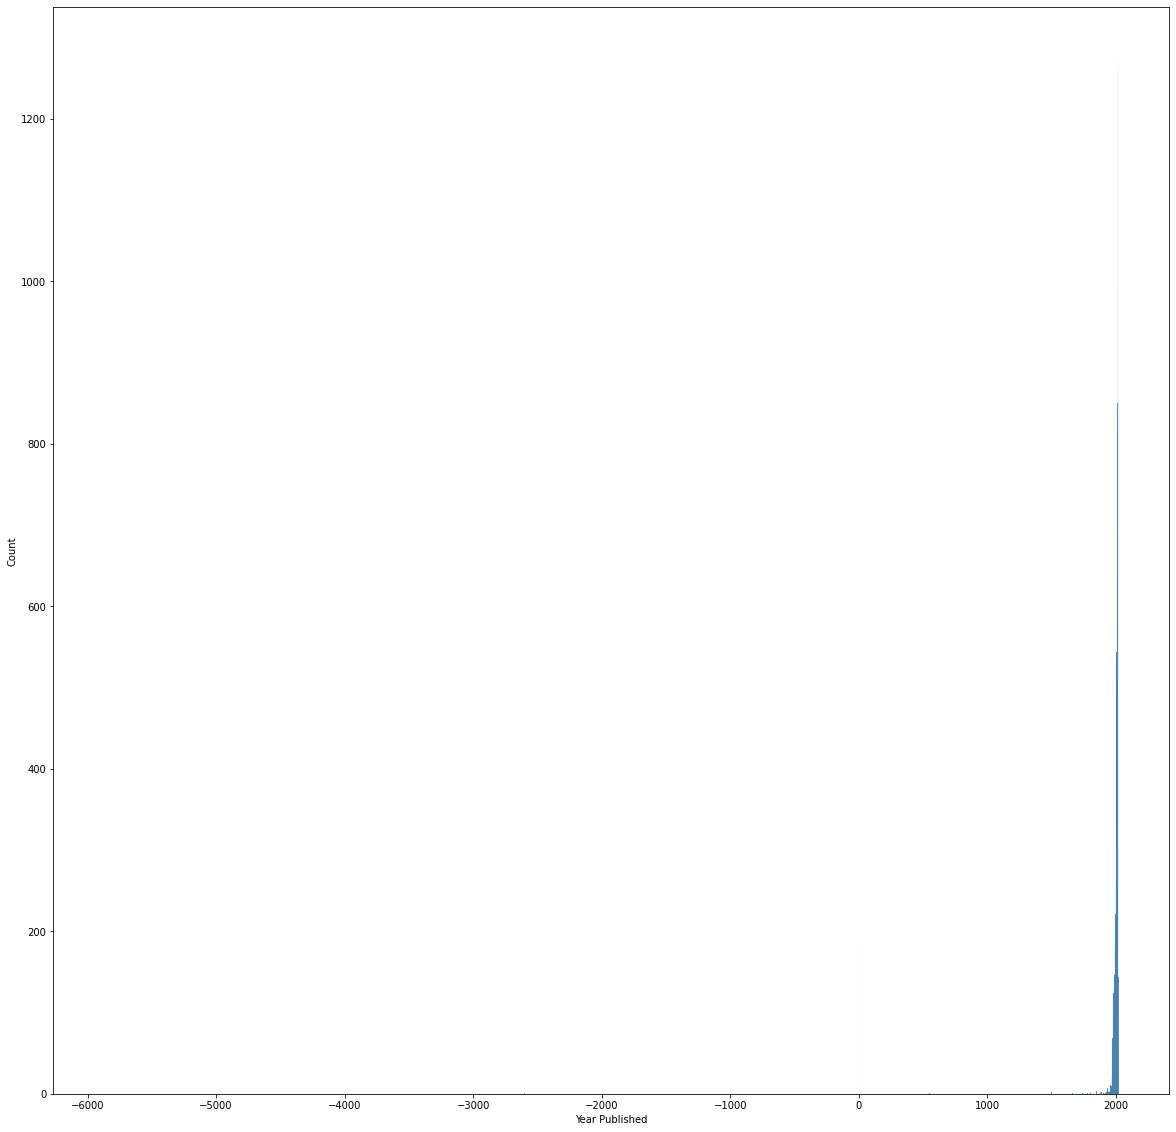

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.histplot(df['Year Published']) #distribución de datos para la columna "Min Players" o cantidad mínima de jugadores
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

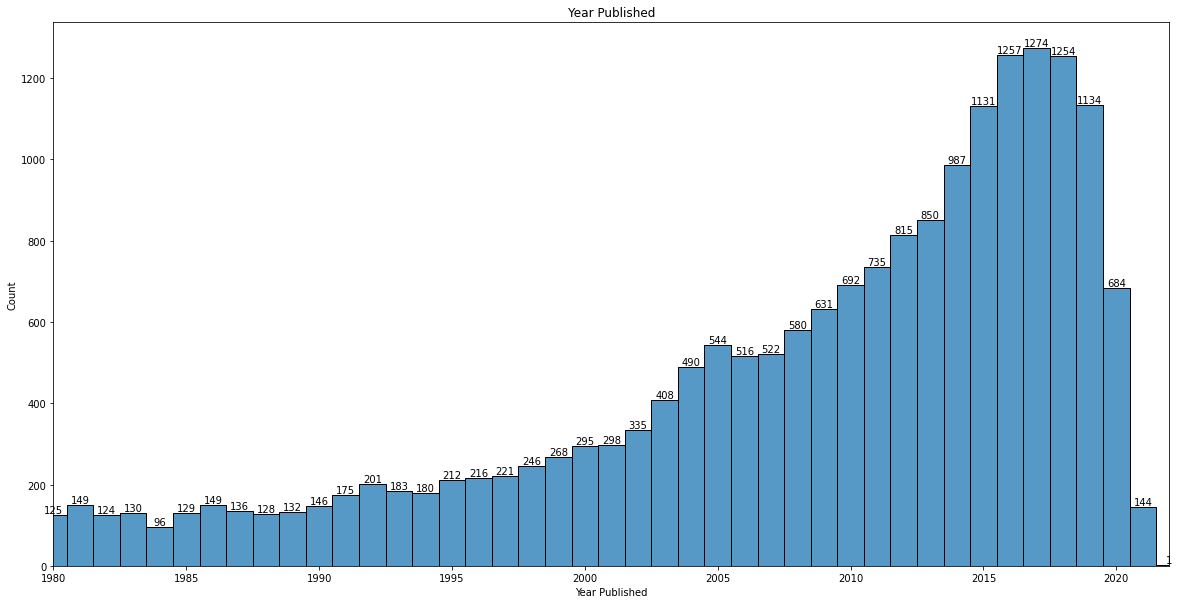

In [154]:
plt.figure(figsize=(20, 10))
plt.xlim(1980,2022)
plt.title('Year Published')
ax = sns.histplot(df['Year Published'], binwidth=10, kde=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='center', 
                fontsize=10, 
                xytext=(0, 5),  # Offset the label slightly
                textcoords='offset points')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

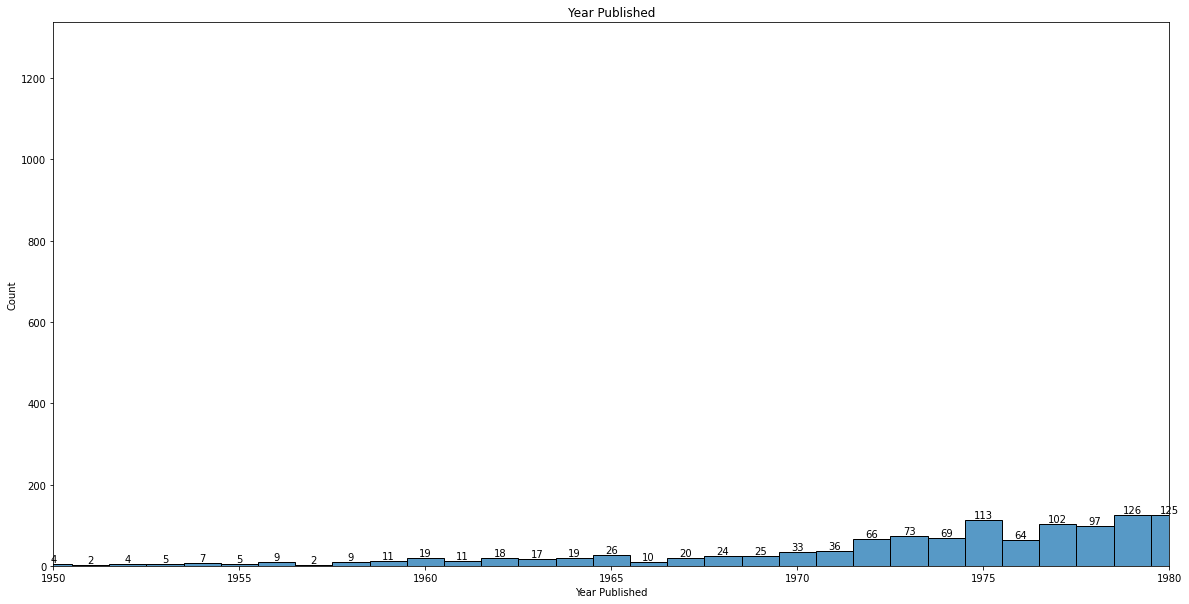

In [155]:
plt.figure(figsize=(20, 10))
plt.xlim(1950,1980)
plt.title('Year Published')
ax = sns.histplot(df['Year Published'], binwidth=10, kde=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='center', 
                fontsize=10, 
                xytext=(0, 5),  # Offset the label slightly
                textcoords='offset points')
plt.show

# Filtrando datos basados en Year Published

Segmentaremos los datos seleccionando solo aquellos que sean despues de 1980.

In [180]:
df_filtered = df[df['Year Published'].astype(int) > 1980]
print(df_filtered)

             ID                                   Name Year Published  \
0      174430.0                             Gloomhaven         2017.0   
1      161936.0              Pandemic Legacy: Season 1         2015.0   
2      224517.0                      Brass: Birmingham         2018.0   
3      167791.0                      Terraforming Mars         2016.0   
4      233078.0      Twilight Imperium: Fourth Edition         2017.0   
...         ...                                    ...            ...   
20315    5339.0                        Monopoly Junior         1990.0   
20316    5050.0  The Worst-Case Scenario Survival Game         2001.0   
20325  205322.0             The Oregon Trail Card Game         2016.0   
20326    3510.0                    Battle of the Sexes         1997.0   
20334    3522.0                                    LCR         1983.0   

       Min Players  Max Players  Play Time  Min Age  Users Rated  \
0                1            4        120       14    

# Distribución de los datos

En los siguientes gráficos observamos las siguientes distribuciones:


* Year Published: datos alineado a la derecha
* Min Players: datos alineados a la izquierda

* Max Players: alineado a la izquierda, en esta variable hay 3 juegos entre ellos (Gloomhaven , Pandemic Legacy: Season 1 y  Brass: Birmingham ) que el valor Max Players contiene el número 999. Esto puede ser un error en los datos suministrados o publicados por el sitio web.

* Play Time: alineado a la izquierda
* Min Age: Distribución normal con datos aislados

* Rating Average: Distribución normal con datos aislados


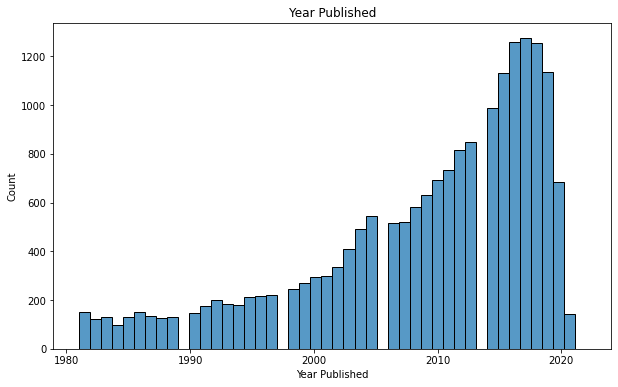

In [157]:
# Para columna Year Published
columns_to_plot = [ 'Year Published' ]


for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    #plt.xlim(2000,2024)
    sns.histplot(df_filtered[column])
    plt.title(column)
    plt.show()


In [165]:
pd.Series(df_filtered['Year Published'].unique()).sort_values()

39    1981.0
20    1982.0
34    1983.0
36    1984.0
30    1985.0
26    1986.0
38    1987.0
37    1988.0
35    1989.0
33    1990.0
23    1991.0
28    1992.0
22    1993.0
31    1994.0
17    1995.0
29    1996.0
19    1997.0
27    1998.0
21    1999.0
24    2000.0
32    2001.0
12    2002.0
25    2003.0
13    2004.0
5     2005.0
15    2006.0
9     2007.0
14    2008.0
18    2009.0
16    2010.0
7     2011.0
6     2012.0
8     2013.0
11    2014.0
1     2015.0
3     2016.0
0     2017.0
2     2018.0
10    2019.0
4     2020.0
40    2021.0
41    2022.0
dtype: object

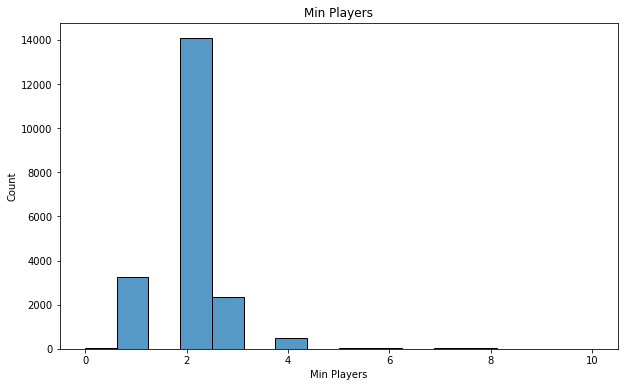

In [166]:
# Para columna Minimum Number of Players
columns_to_plot = [ 'Min Players' ]


for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

In [168]:
df_filtered.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains',
       'Mechanics_split'],
      dtype='object')

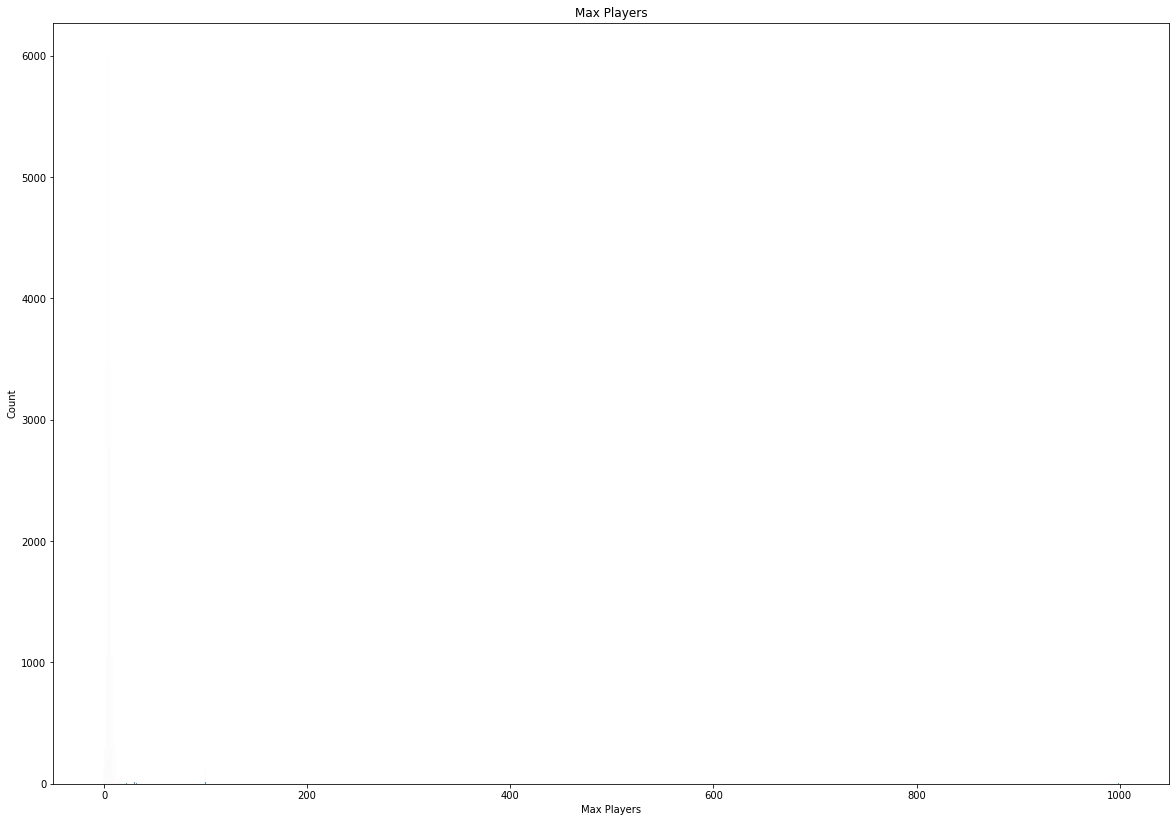

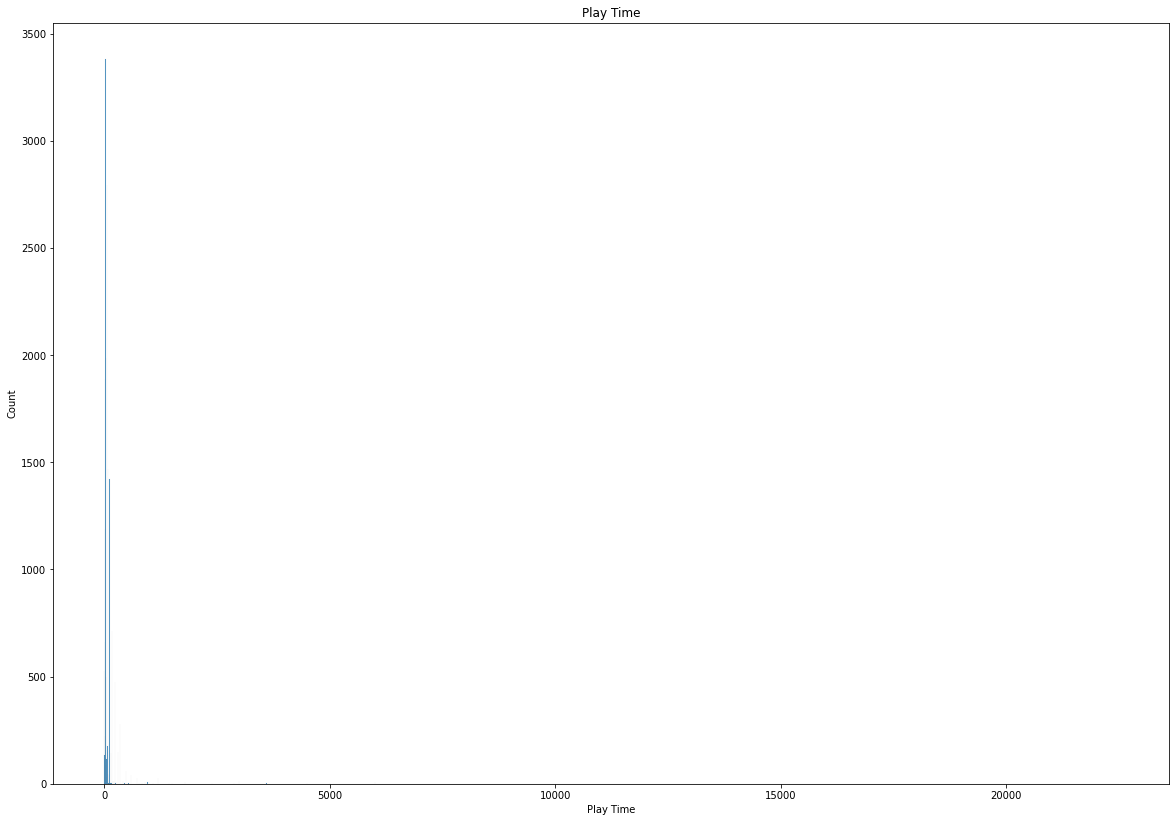

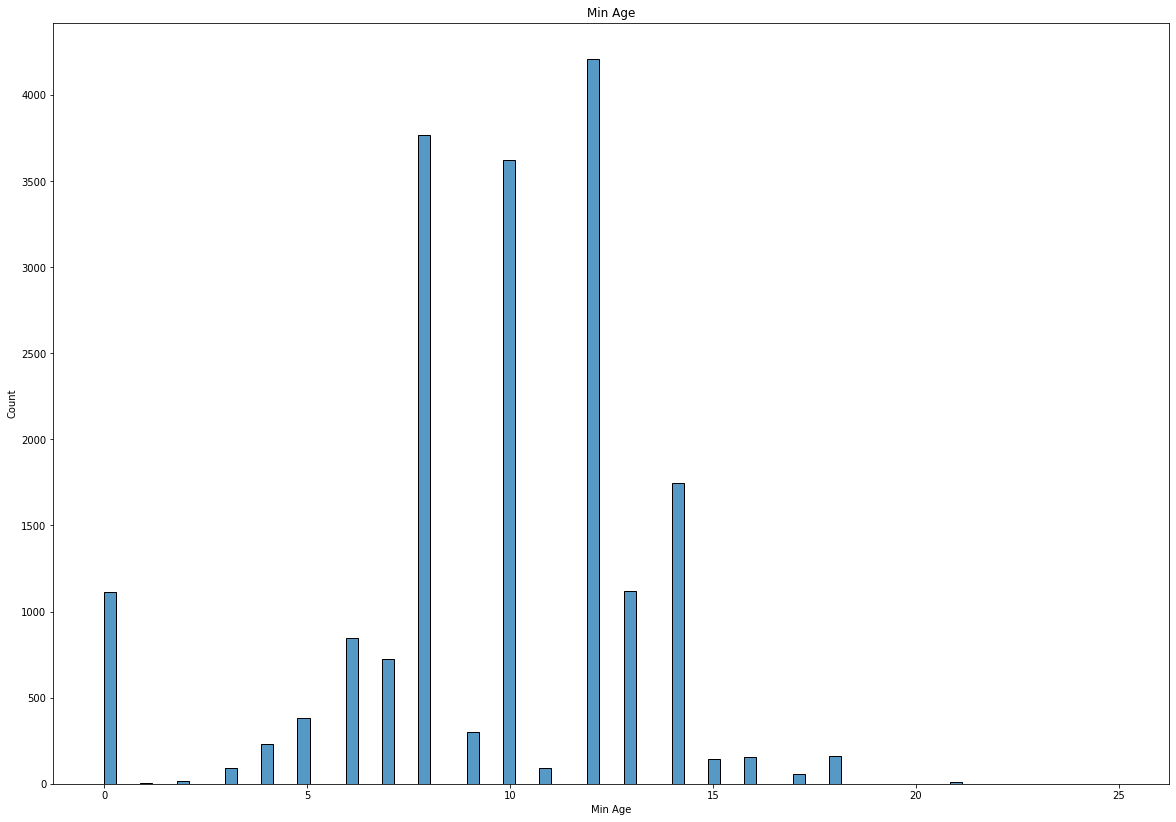

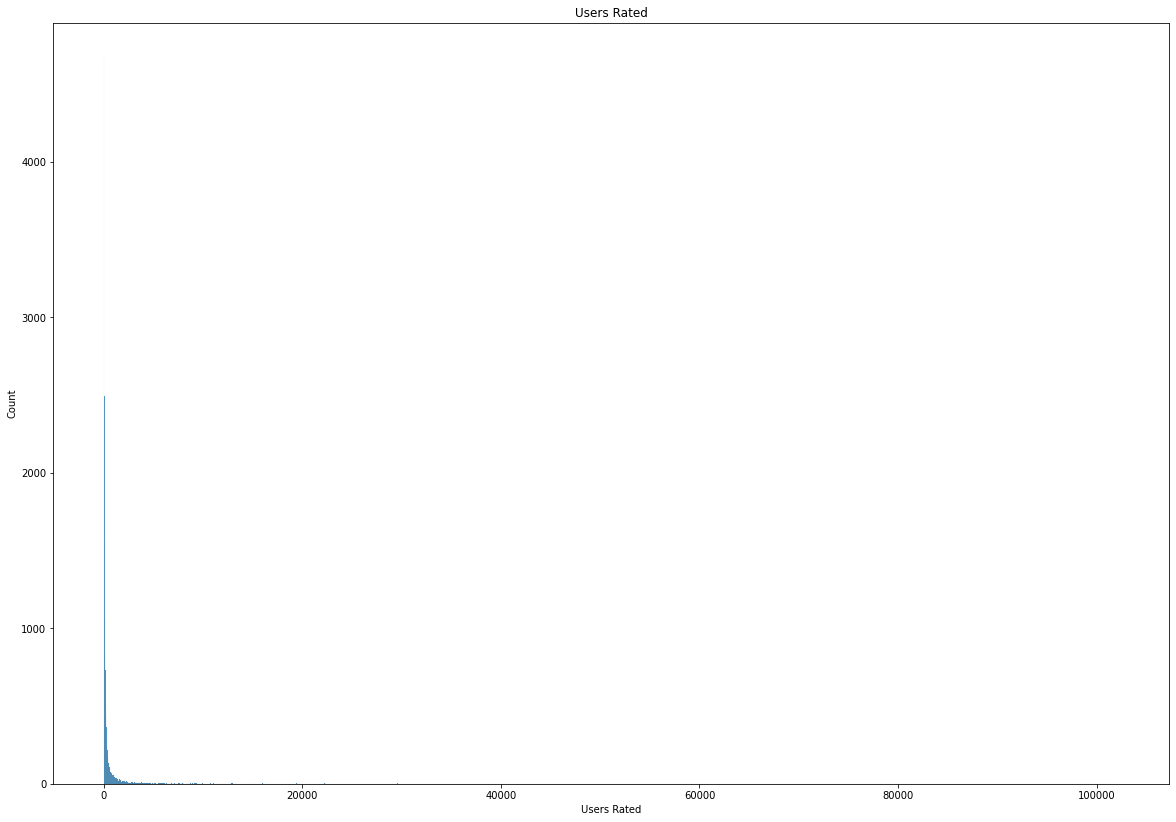

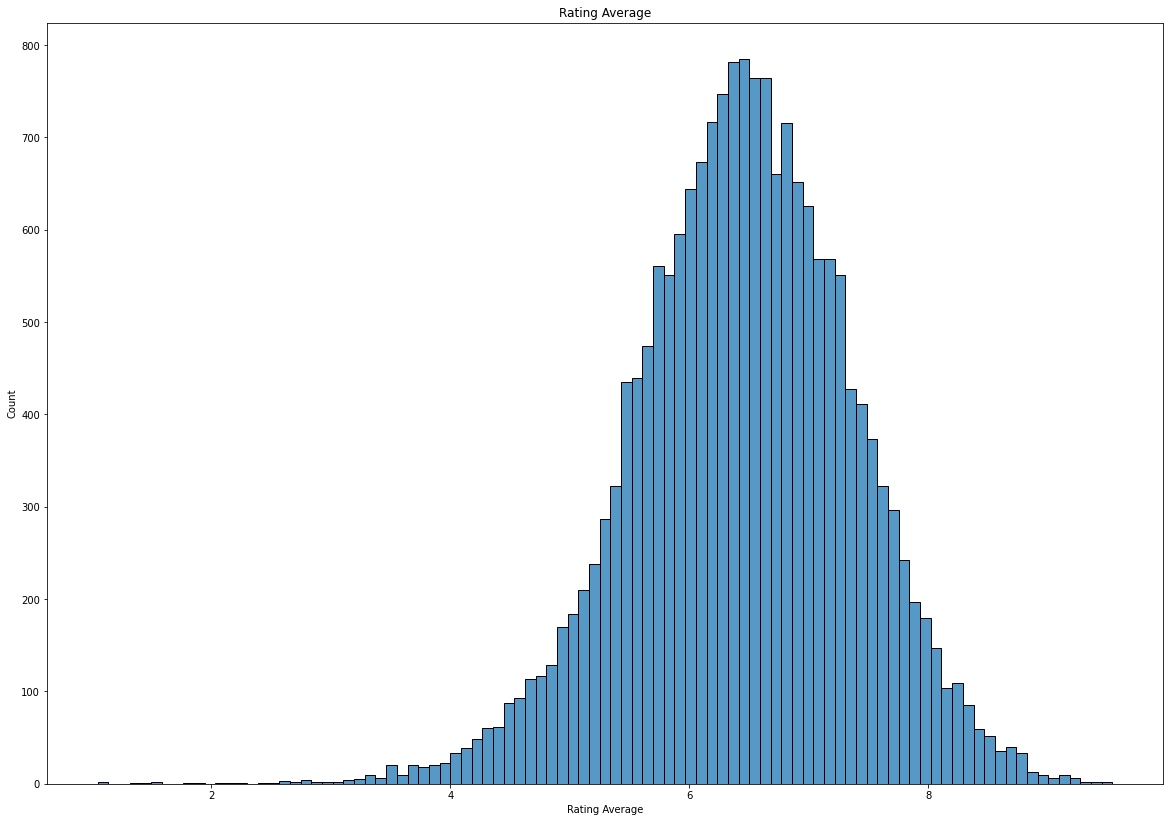

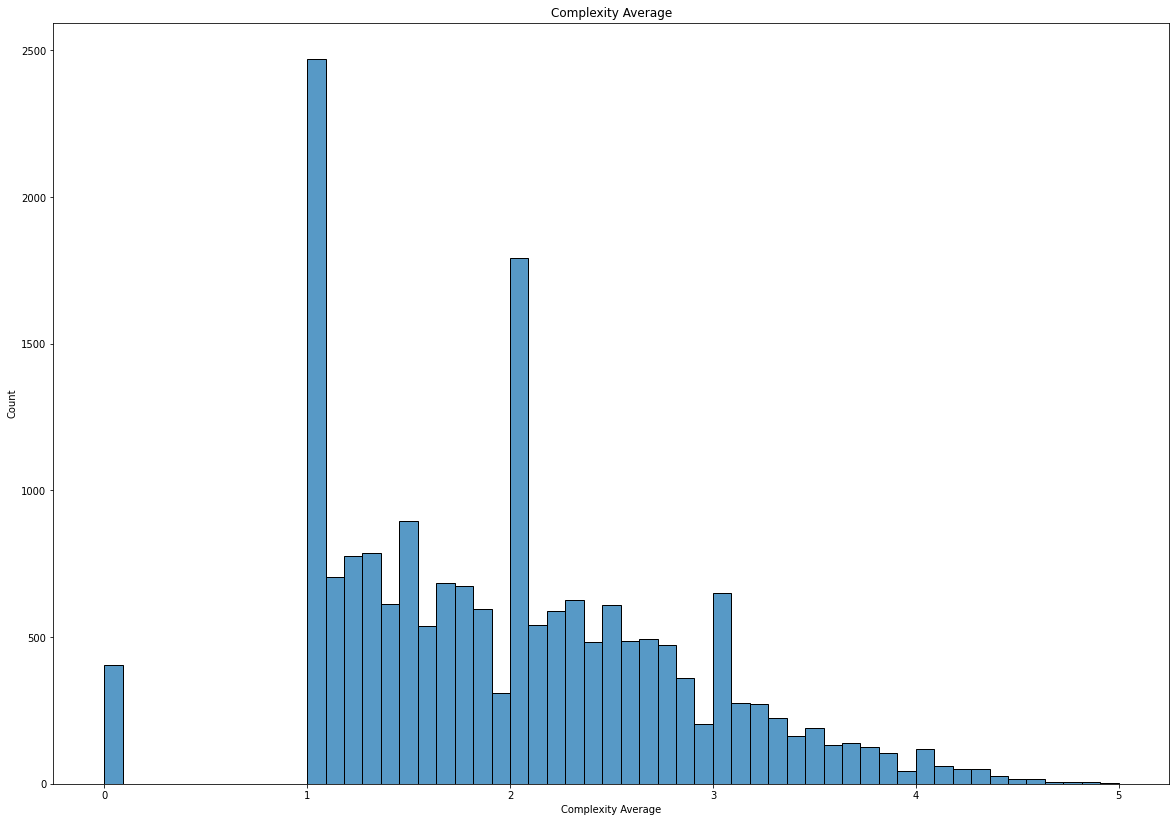

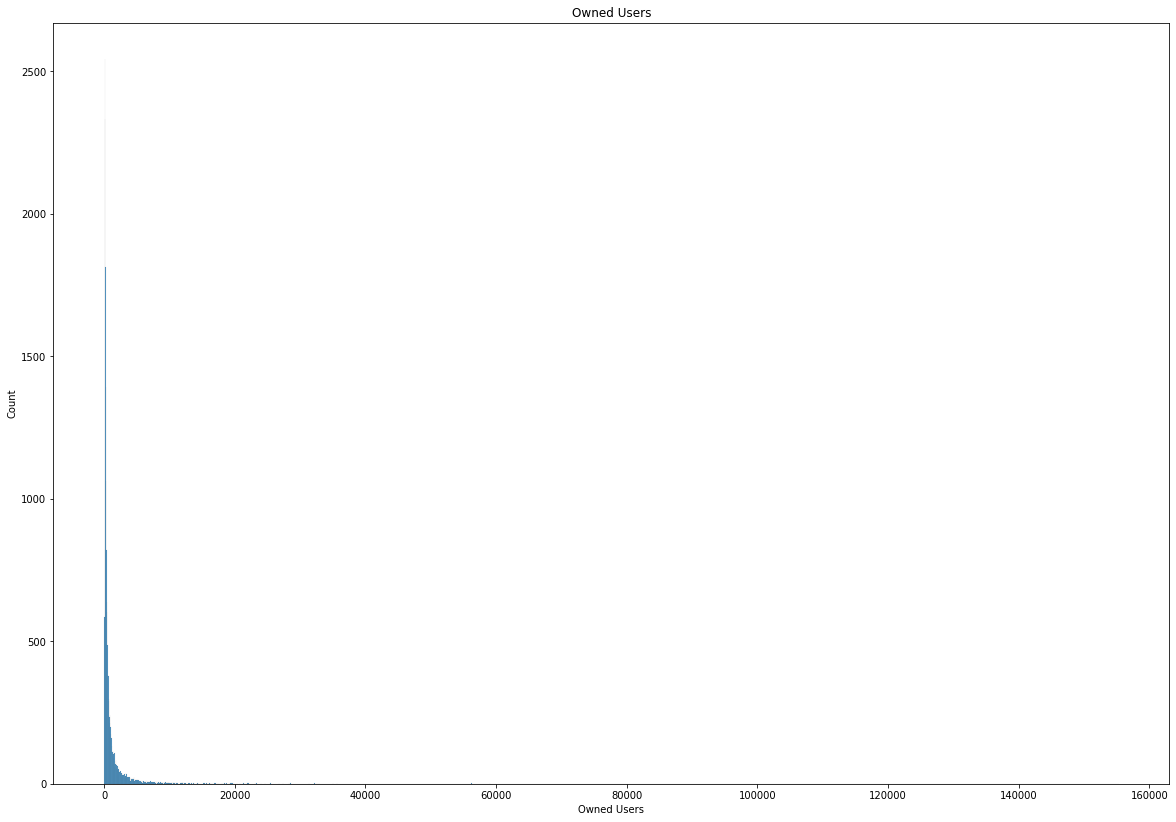

In [170]:
# Para el resto de columnas
columns_to_plot = ['Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average', 'Owned Users']


for column in columns_to_plot:
    plt.figure(figsize=(20, 14))
    sns.histplot(df_filtered[column])
    plt.title(column)
    plt.show()

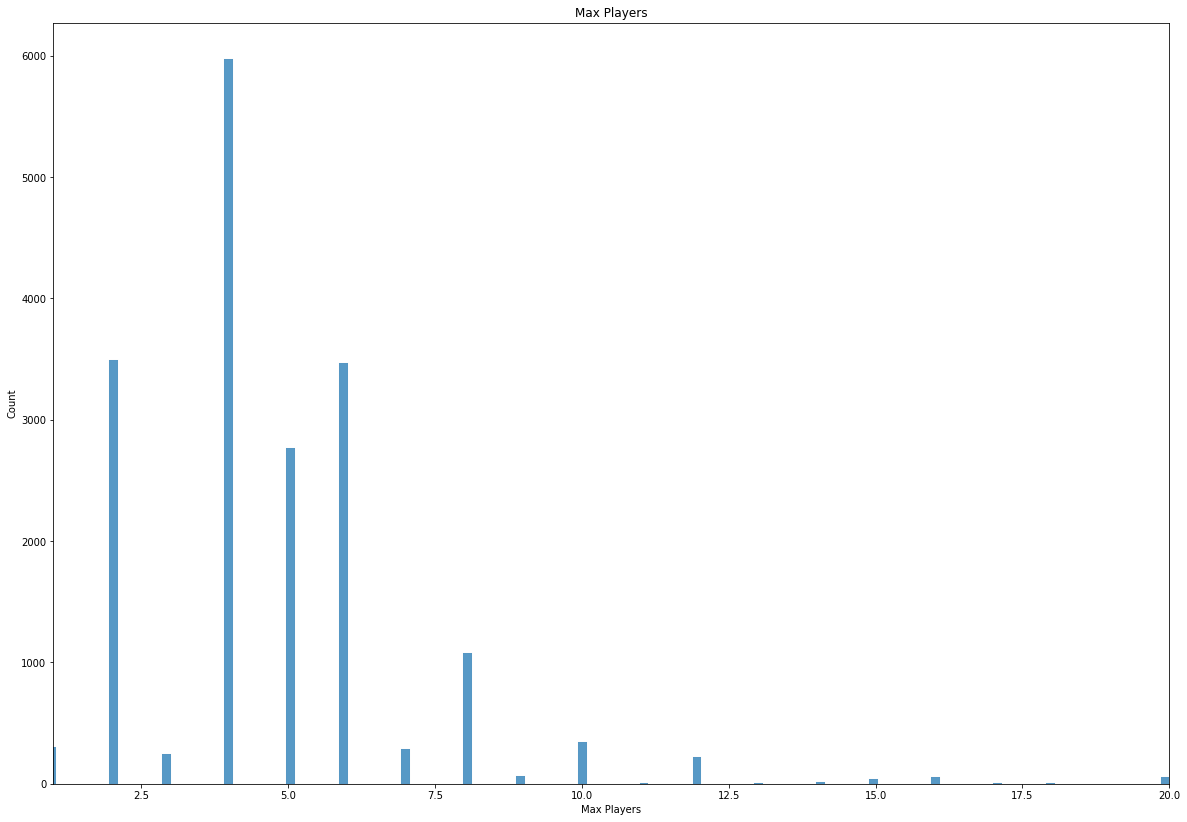

In [171]:
plt.figure(figsize=(20, 14))
sns.histplot(df_filtered['Max Players'])
plt.xlim(1,20)
plt.title('Max Players')
plt.show()

In [181]:
df_filtered = df_filtered[df_filtered['Max Players'] < 20]

In [182]:
df_filtered.shape

(18508, 15)

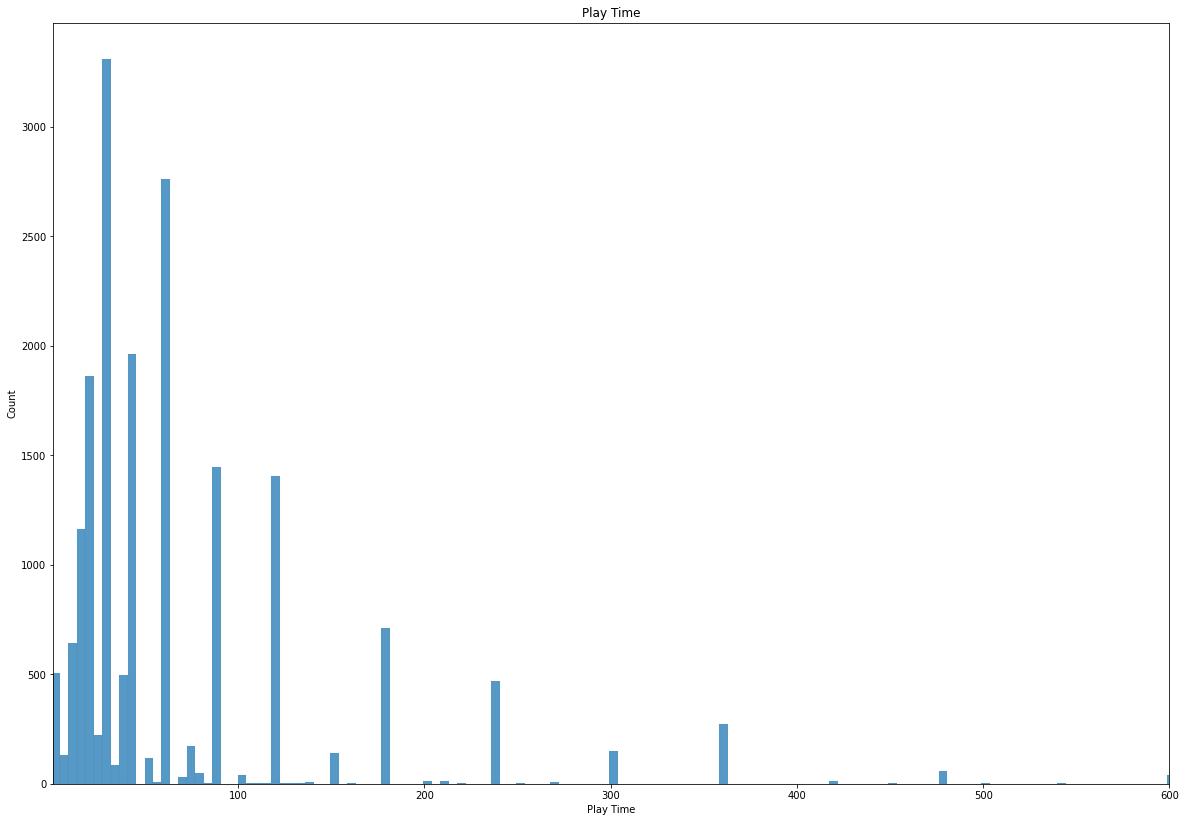

In [190]:
plt.figure(figsize=(20, 14))
sns.histplot(df_filtered['Play Time'])
plt.xlim(1, 600)
plt.title('Play Time')
plt.show()

In [191]:
df_filtered = df_filtered[df_filtered["Play Time"] < 600]
df_filtered.shape

(18310, 15)

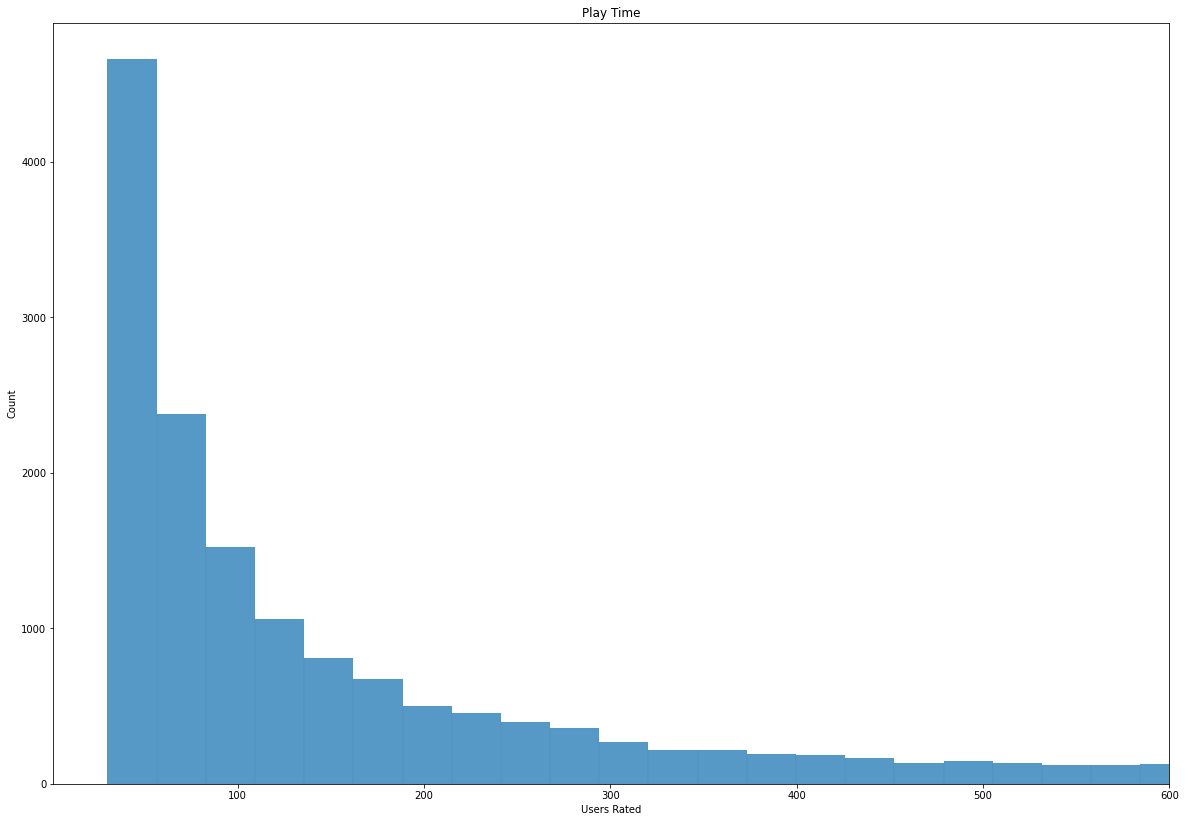

In [193]:
plt.figure(figsize=(20, 14))
sns.histplot(df_filtered['Users Rated'])
plt.xlim(1, 600)
plt.title('Play Time')
plt.show()

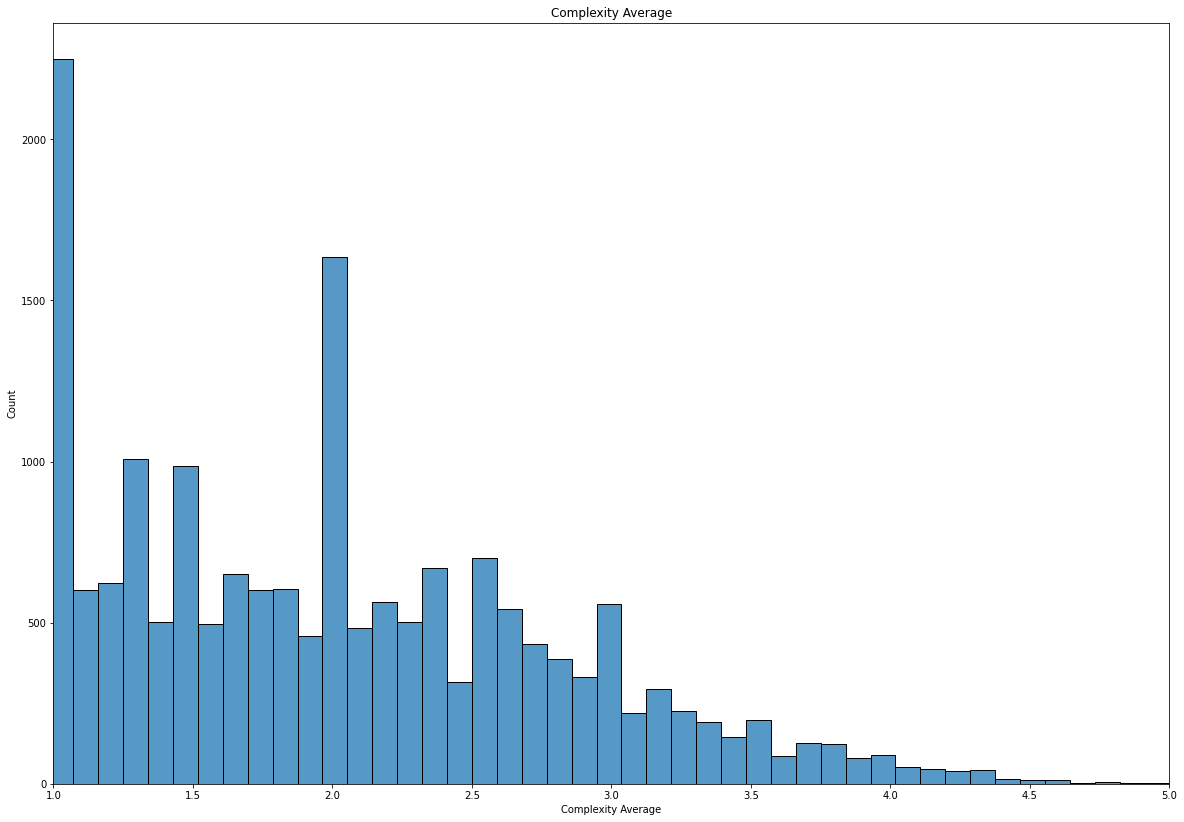

In [196]:
plt.figure(figsize=(20, 14))
sns.histplot(df_filtered['Complexity Average'])
plt.xlim(1, 5)
plt.title('Complexity Average')
plt.show()

In [198]:
df_filtered = df_filtered[df_filtered['Complexity Average'] < 5]
df_filtered.shape

(18309, 15)

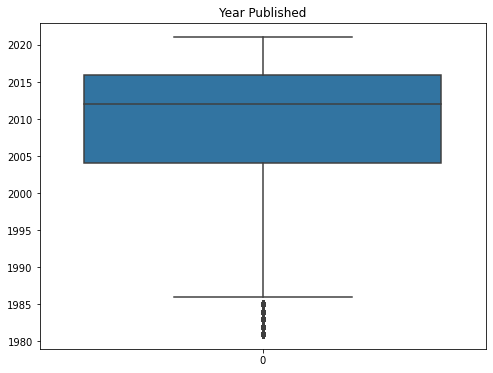

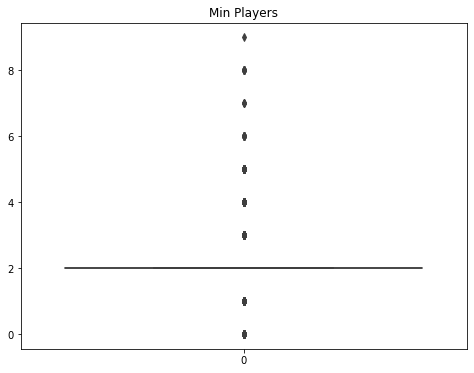

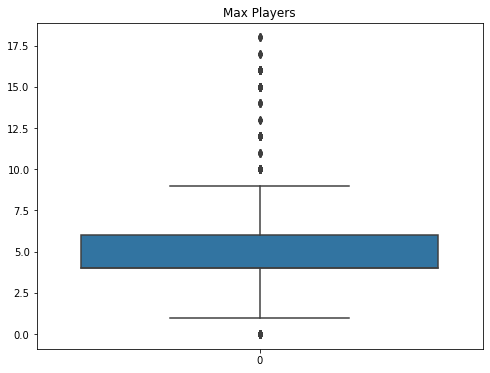

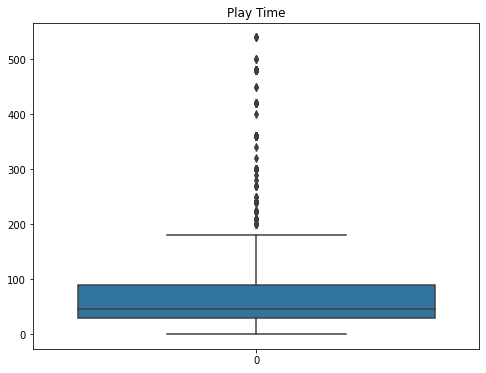

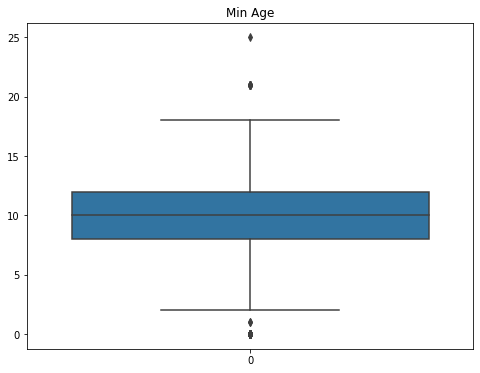

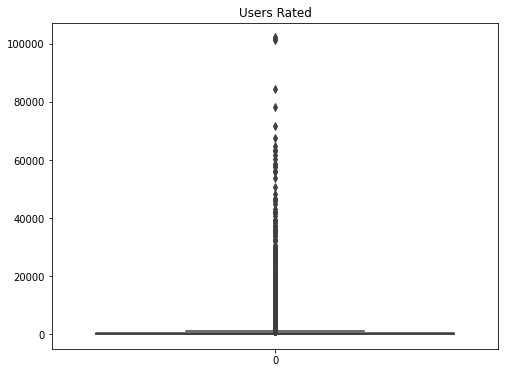

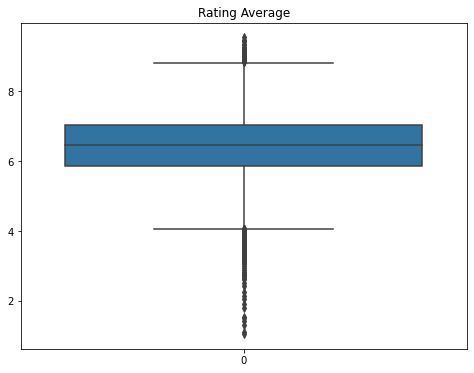

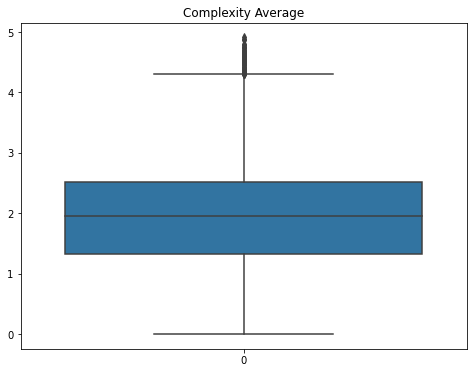

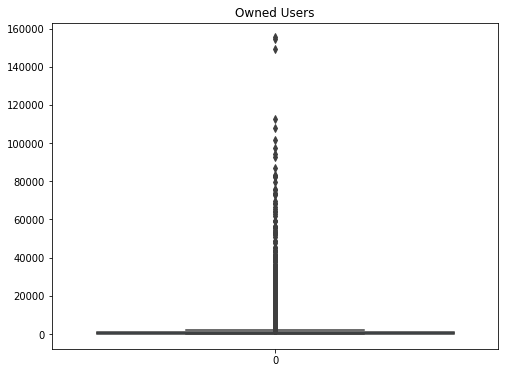

In [202]:
# Column list
columns_to_plot = ['Year Published' , 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average', 'Owned Users']

# setting up the plot
#

# creating subplots for each column
for colunm in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_filtered[colunm])
    plt.title(colunm)
    plt.show()


# Diagramas de Dispersión.



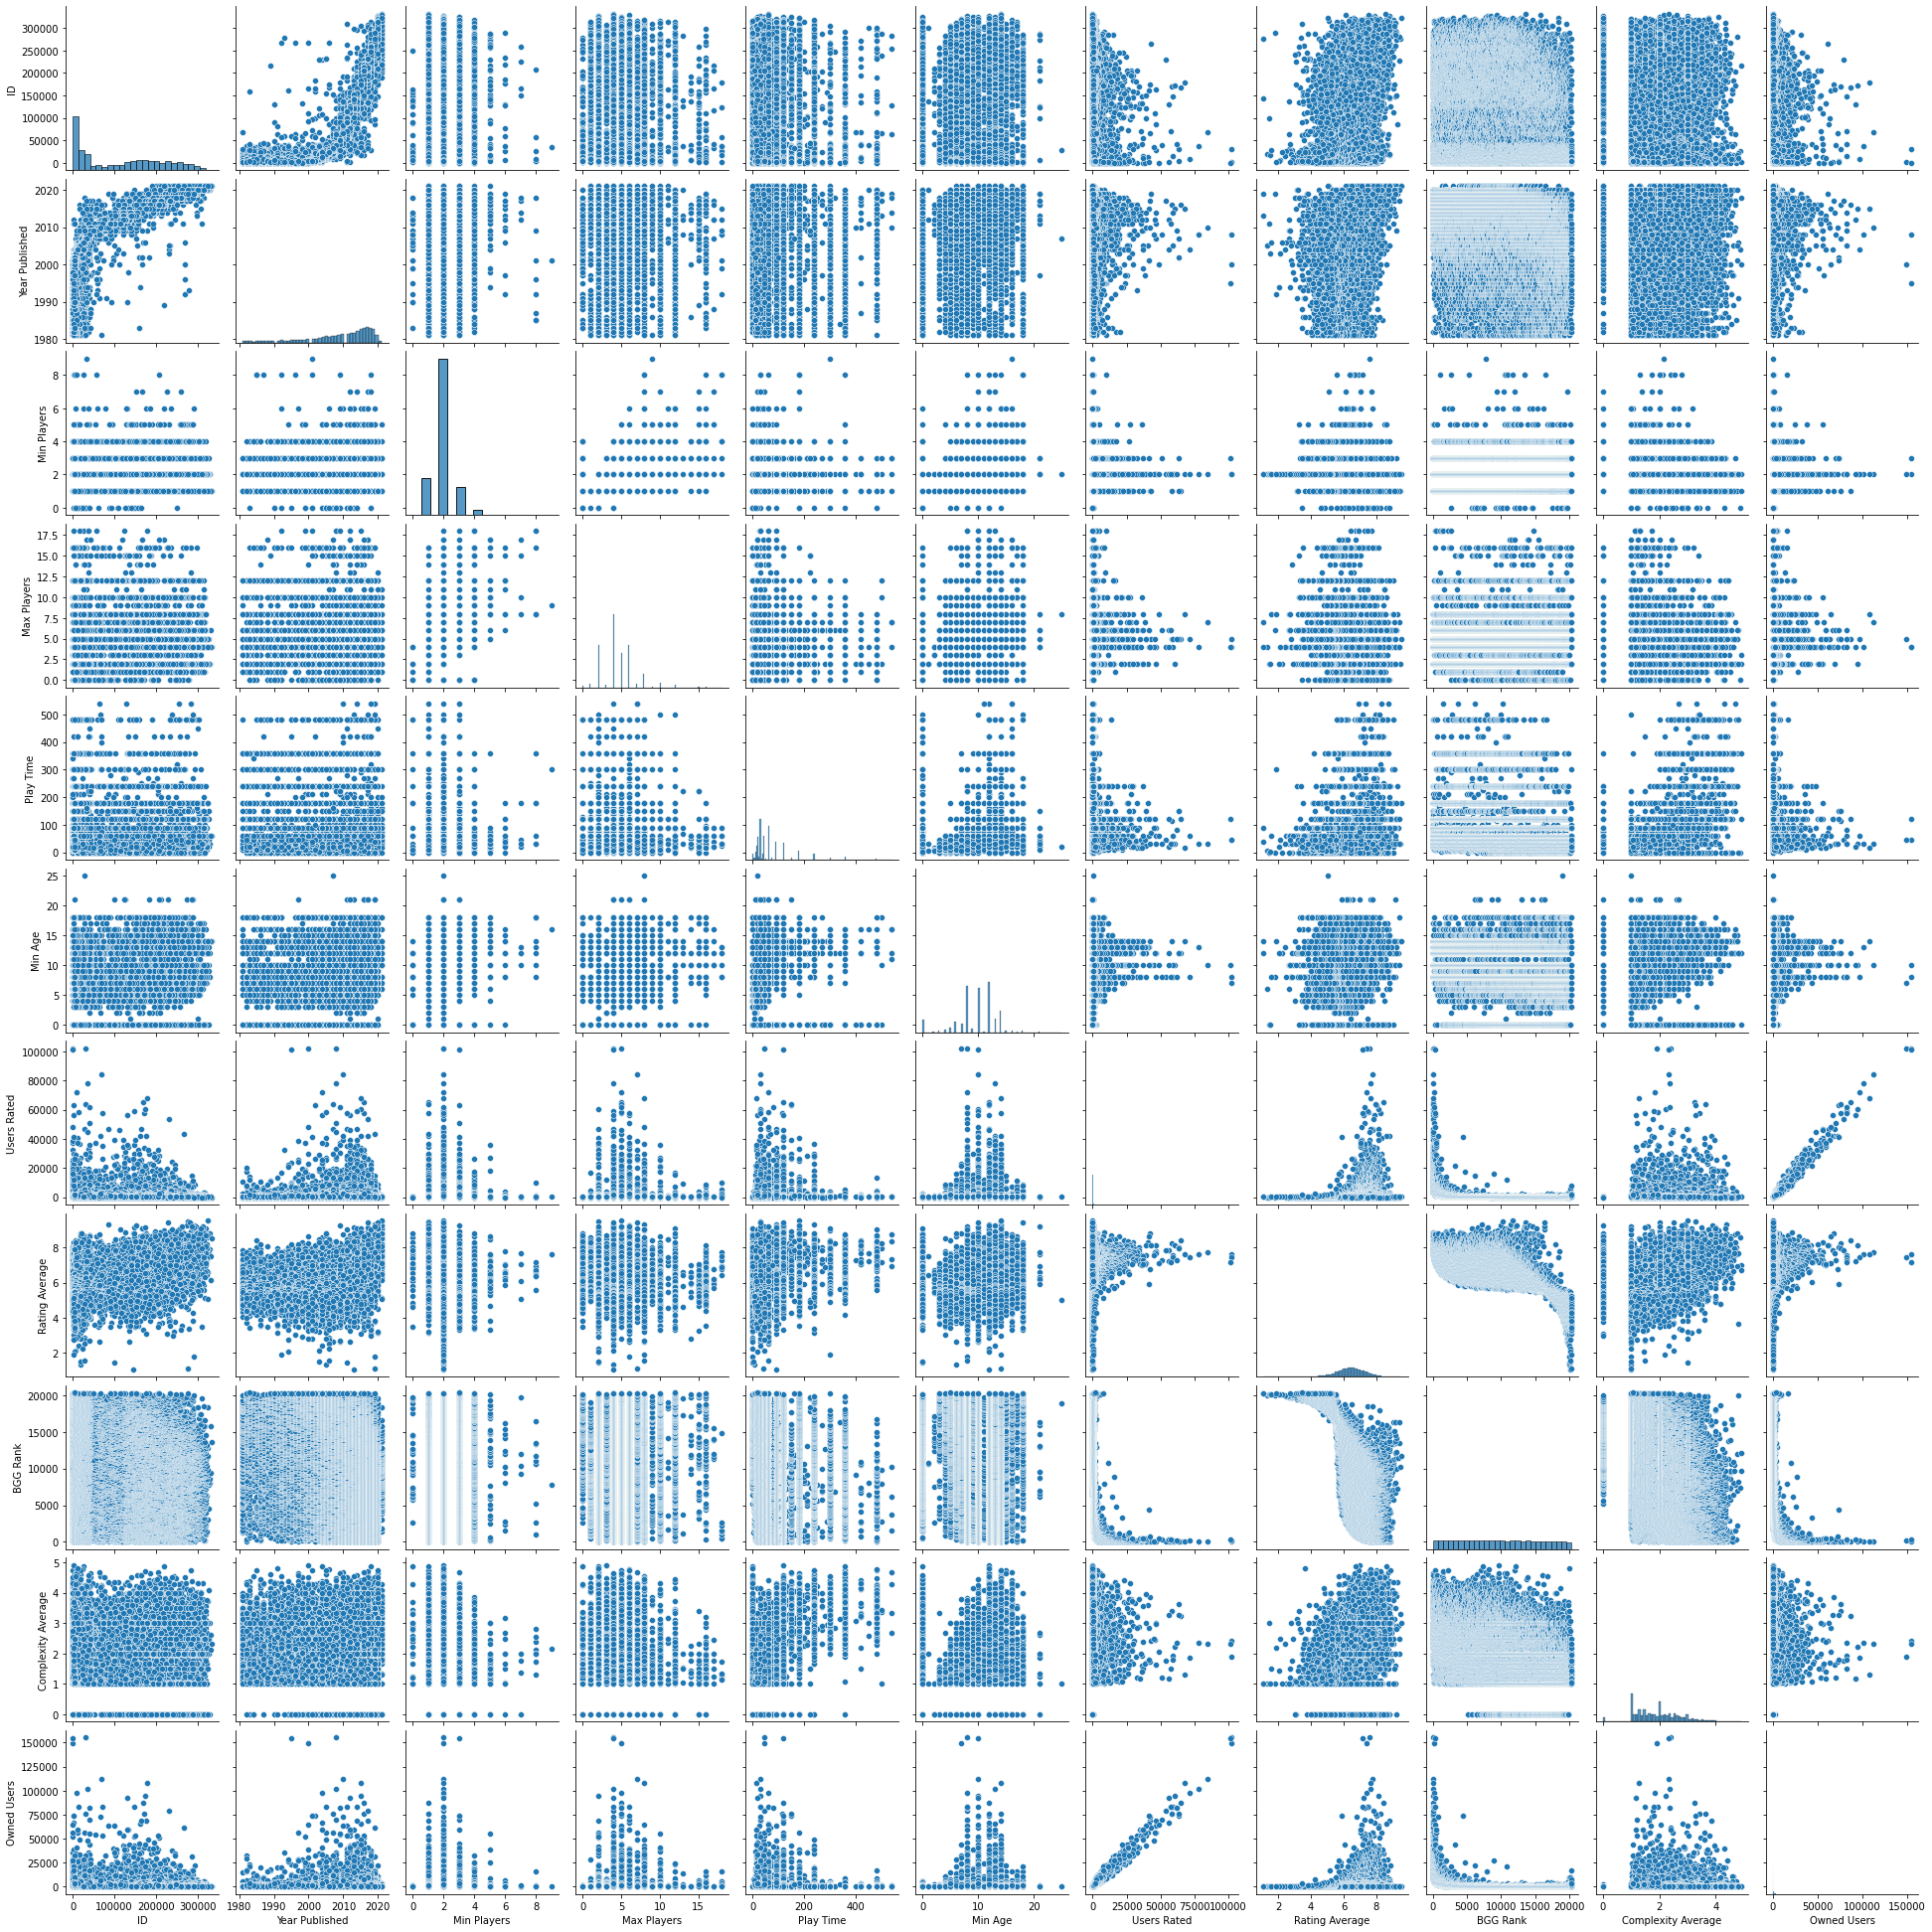

In [203]:
sns.pairplot(df_filtered)
plt.show()

In [47]:
df.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

# Correlación de Pearson

El coeficiente de correlación de Pearson mide la relación lineal entre dos variables. Varía de -1 a 1, donde:

* 1 indica una relación lineal positiva perfecta.
* -1 indica una relación lineal negativa perfecta.
* 0 indica que no hay relación lineal.
El coeficiente de correlación de Pearsonl.


**Interpretación de los valores de correlación**

* 0.9 a 1.0 o -0.9 a -1.0: Correlación positiva o negativa muy alta.
* 0.7 a 0.9 o -0.7 a -0.9: Correlación positiva o negativa alta.
* 0.5 a 0.7 o -0.5 a -0.7: Correlación positiva o negativa moderada.
* 0.3 a 0.5 o -0.3 a -0.5: Correlación positiva o negativa baja.
* 0.0 a 0.3 o -0.0 a -0.3: Correlación positiva o negativa muy baja (débil).

En el siguiente grafico observamos la correlación en nuestros datos, en donde podemos destacar que las Users Rated tienen correlación muy alta con la columna objetivo Owned Users.

La edad y la densidad de pasajeros mantienen correlaciones negativas con respecto a las demás columnas lo que indica que las ultimas embarcaciones de esta compañía han sido más grandes.


C:\Users\chima\AppData\Local\Temp\ipykernel_42696\1382177597.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


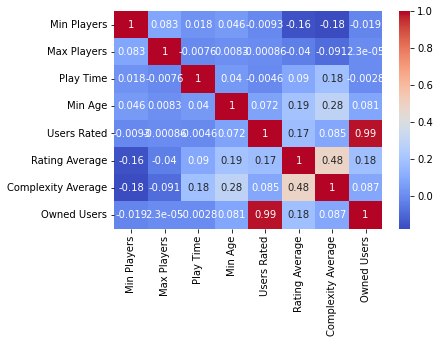

In [204]:
df_corr = ['Year Published' , 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average', 'Owned Users']
new_df = df[df_corr]
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

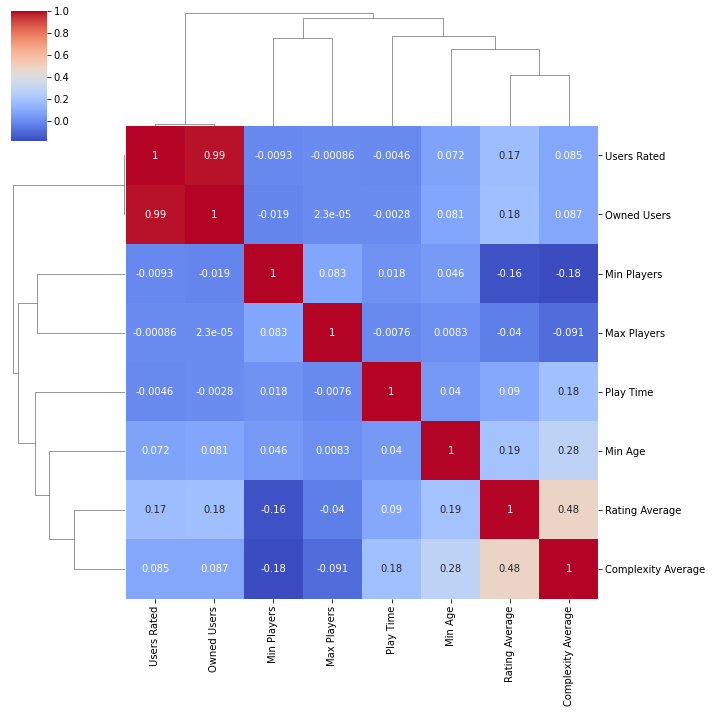

In [205]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()